In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('train_bf.csv')
df.shape

(550068, 12)

In [5]:
#Sampling 5 rows to see what the data looks like
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
69807,1004682,P00184542,M,26-35,7,B,3,1,8,13.0,NaN,8025
374239,1003626,P00047442,M,26-35,17,B,3,0,5,18.0,NaN,5474
421256,1004808,P00294142,M,36-45,0,A,1,1,5,8.0,15.0,7026
538287,1004861,P00354542,M,26-35,4,C,1,0,5,NaN,NaN,8705
190892,1005502,P00157342,M,26-35,2,A,4+,0,8,NaN,NaN,7845


In [6]:
#Obtaining basic info about the columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


# Handling Categorical Columns

In [7]:
#Dropping User_ID because it is irrelevant for prediction
df.drop('User_ID', inplace=True, axis =1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
#Converting 'Gender' to a numeric column
df['Gender']=df['Gender'].map({'F':0, 'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [9]:
#Handling 'Age' column
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
df['Age'] = df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})
df.sample(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
18370,P00355142,1,3,11,B,4+,0,1,15.0,NaN,15330
226162,P00033942,0,5,6,C,3,1,5,NaN,NaN,7025
168101,P00217942,1,3,15,A,4+,0,5,NaN,NaN,5321
76560,P00127942,1,4,17,A,1,0,1,2.0,5.0,11881
443048,P00226242,1,7,13,C,0,1,11,15.0,NaN,4614


In [11]:
#Handling the 'City_Category' column
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()
df['City_Category']= Label_Encoder.fit_transform(df['City_Category'])
df.sample(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
340536,P00293342,1,5,3,1,2,1,8,NaN,NaN,9861
474582,P00054042,1,2,20,2,1,0,18,NaN,NaN,3060
459242,P00349942,1,3,4,1,3,1,1,5.0,NaN,11607
51974,P00358042,1,1,10,1,1,0,8,NaN,NaN,6143
423691,P00319142,1,3,7,1,4+,0,5,14.0,NaN,5317


In [12]:
#Handling 'Stay_In_Current_City_Years' column
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [13]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+', '')
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,0,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,0,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,0,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,2,4,0,8,NaN,NaN,7969


In [14]:
#Convert object into integer
df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int32  
 5   Stay_In_Current_City_Years  550068 non-null  int64  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          376430 non-null  float64
 9   Product_Category_3          166821 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(1), int64(7), object(1)
memory usage: 44.1+ MB


In [15]:
df.shape

(550068, 11)

# Missing value handling

In [16]:
# Checking the number of missing values in each column
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [17]:
# Handling missing values in 'Product_Category_2'
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [18]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [19]:
# Replace the missing values with mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_2'].isnull().sum()

0

In [20]:
# Handling missing values in 'Product_Category_3'
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: count, dtype: int64

In [21]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df['Product_Category_3'].isnull().sum()

0

In [22]:
#Checking if all null values are removed except the label column
print(df.isnull().sum())

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


# Visualization

In [23]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Purchase'>

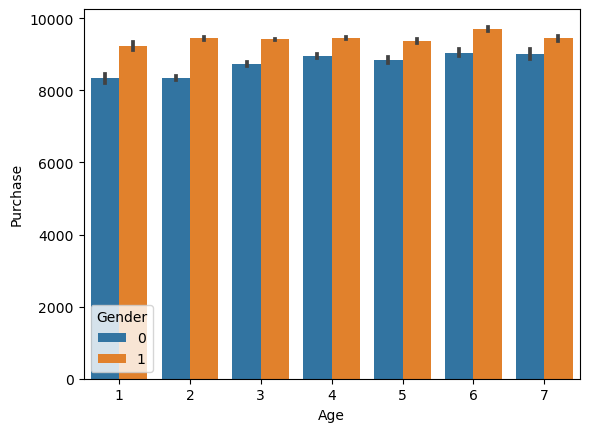

In [24]:
# Visualisation Age vs Purchased
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

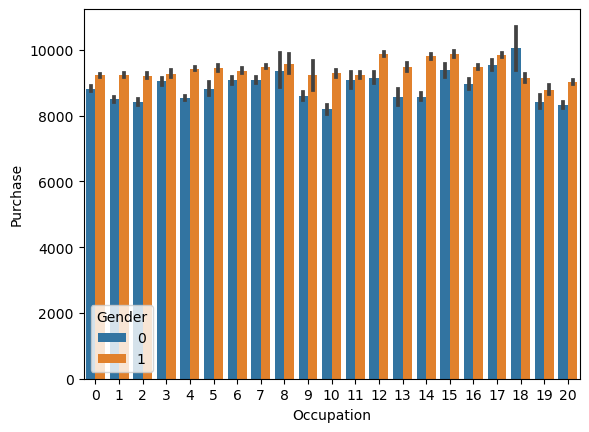

In [25]:
## Visualization of Purchase with occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

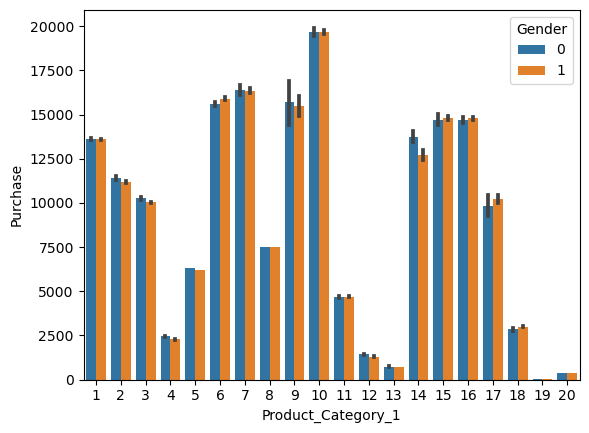

In [26]:
sns.barplot(x='Product_Category_1', y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

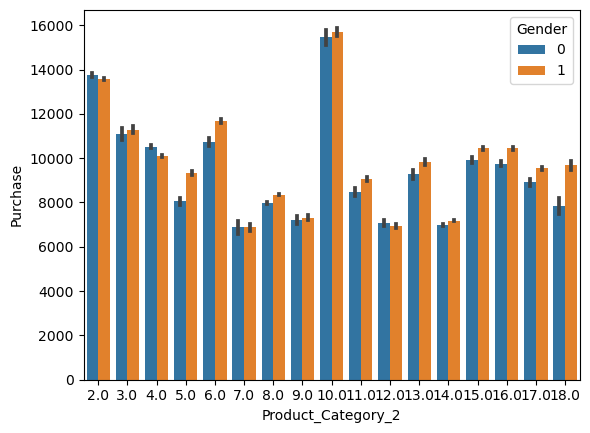

In [27]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

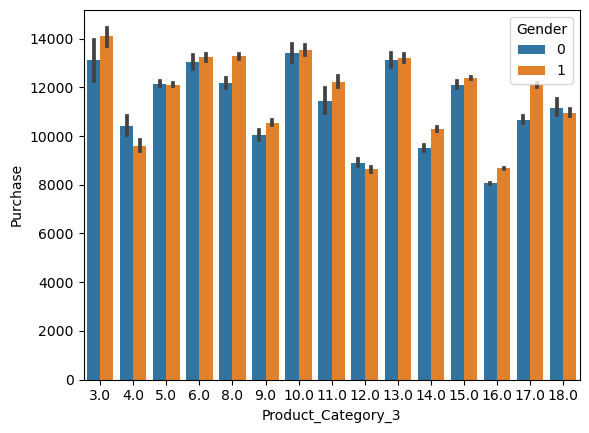

In [28]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

In [29]:
df.drop('Product_ID', axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,0,2,0,3,8.0,16.0,8370
1,0,1,10,0,2,0,1,6.0,14.0,15200
2,0,1,10,0,2,0,12,8.0,16.0,1422
3,0,1,10,0,2,0,12,14.0,16.0,1057
4,1,7,16,2,4,0,8,8.0,16.0,7969


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [31]:
x = df.iloc[:,0:9]
y = df['Purchase']

In [32]:
# Splitting Train and test Data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [36]:
# Scaling the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [1]:
import pickle
from sklearn.model_selection import RandomizedSearchCV

def evaluate_and_pickle_best_model(model_class, param_distributions, x_train, y_train, x_test, y_test, model_name, n_iter=5):
    # Random search for hyperparameter tuning
    random_search = RandomizedSearchCV(
        estimator=model_class(),
        param_distributions=param_distributions,
        n_iter=n_iter,
        scoring='neg_mean_absolute_percentage_error',
        cv=5,
        random_state=42
    )
    
    random_search.fit(x_train, y_train)
    
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    
    y_train_pred = best_model.predict(x_train)
    y_test_pred = best_model.predict(x_test)
    
    train_mape = mean_absolute_percentage_error(y_true=y_train, y_pred=y_train_pred)
    train_mse = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
    test_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=y_test_pred)
    test_mse = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
    
    # Creating a DataFrame to display the evaluation metrics
    evaluation_df = pd.DataFrame({
        'Train_MAPE': [train_mape],
        'Train_MSE': [train_mse],
        'Test_MAPE': [test_mape],
        'Test_MSE': [test_mse]
    })
    
    # Pickle the best model
    filename = f"{model_name}_best_model.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(best_model, file)
    
    return evaluation_df, filename, best_params


In [33]:
import numpy as np

In [34]:
# Define parameter distributions for each model
param_distributions_knn = {'n_neighbors': np.arange(1, 51)}
param_distributions_dtr = {'max_depth': np.arange(1, 51)}
param_distributions_rfr = {'max_depth': np.arange(1, 51)}


In [37]:
# Evaluate and pickle KNeighborsRegressor
knn_evaluation, knn_best_model_file, knn_best_params = evaluate_and_pickle_best_model(
    KNeighborsRegressor, param_distributions_knn, x_train_scaled, y_train, x_test_scaled, y_test, 'knn', n_iter=5
)

print("KNeighborsRegressor Evaluation:")
print(knn_evaluation)
print(f"Best KNeighborsRegressor model saved as: {knn_best_model_file}")
print(f"Best parameters: {knn_best_params}")

KNeighborsRegressor Evaluation:
   Train_MAPE     Train_MSE  Test_MAPE      Test_MSE
0    0.717689  1.086641e+07   0.778873  1.253965e+07
Best KNeighborsRegressor model saved as: knn_best_model.pkl
Best parameters: {'n_neighbors': 14}


In [38]:
# Evaluate and pickle DecisionTreeRegressor
dtr_evaluation, dtr_best_model_file, dtr_best_params = evaluate_and_pickle_best_model(
    DecisionTreeRegressor, param_distributions_dtr, x_train_scaled, y_train, x_test_scaled, y_test, 'decision_tree', n_iter=5
)

print("DecisionTreeRegressor Evaluation:")
print(dtr_evaluation)
print(f"Best DecisionTreeRegressor model saved as: {dtr_best_model_file}")
print(f"Best parameters: {dtr_best_params}")

DecisionTreeRegressor Evaluation:
   Train_MAPE     Train_MSE  Test_MAPE      Test_MSE
0    0.325204  8.048558e+06   0.341624  9.068370e+06
Best DecisionTreeRegressor model saved as: decision_tree_best_model.pkl
Best parameters: {'max_depth': 14}


In [39]:
# Evaluate and pickle RandomForestRegressor
rfr_evaluation, rfr_best_model_file, rfr_best_params = evaluate_and_pickle_best_model(
    RandomForestRegressor, param_distributions_rfr, x_train_scaled, y_train, x_test_scaled, y_test, 'random_forest', n_iter=5
)

print("RandomForestRegressor Evaluation:")
print(rfr_evaluation)
print(f"Best RandomForestRegressor model saved as: {rfr_best_model_file}")
print(f"Best parameters: {rfr_best_params}")

RandomForestRegressor Evaluation:
   Train_MAPE     Train_MSE  Test_MAPE      Test_MSE
0    0.259011  5.538288e+06   0.331318  9.302303e+06
Best RandomForestRegressor model saved as: random_forest_best_model.pkl
Best parameters: {'max_depth': 31}
